Imports

In [618]:
import pandas as pd
import numpy as np
import re
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib

In [619]:
# Load dataset
df = pd.read_csv("data\Corolla_ads_data.csv")
df.head()

,Name,City,Brand,Model,Year,Mileage,Fuel,Transmission,Engine Capacity,Color,Body Type,Price,Ad URL,Description,Registered In,Assembly,Last Updated:,Ad Ref #,Features,Seller Comments
0,Toyota Corolla 2020 for sale in Islamabad,Islamabad,Toyota,Corolla,2020,"4,600 km",Petrol,Automatic,1300 cc,White,Sedan,5400000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota Corolla Gli\nmodel 2020\n2021 registere...,Islamabad,Local,"Aug 22, 2025",10489183,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...",Toyota Corolla Gli model 2020 2021 registered ...
1,Toyota Corolla 2010 for sale in Islamabad,Islamabad,Toyota,Corolla,2010,"225,000 km",Petrol,Manual,1300 cc,Medium Silver,Sedan,2650000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,Outer showered below roof inner total genuine ...,Islamabad,Local,"Aug 21, 2025",10488682,"['ABS', 'AM/FM Radio', 'Air Conditioning', 'Al...",Outer showered below roof inner total genuine ...
2,Toyota Corolla 2017 for sale in Islamabad,Islamabad,Toyota,Corolla,2017,"72,000 km",Petrol,Manual,1300 cc,Grey Graphite,Sedan,4300000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,Just like a brand new car \nIts bumper to bump...,Islamabad,Local,"Aug 21, 2025",10461925,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...",Just like a brand new car Its bumper to bumper...
3,Toyota Corolla 1999 for sale in Islamabad,Islamabad,Toyota,Corolla,1999,111 km,Petrol,Manual,1500 cc,Black,Sedan,1410000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota Corolla 1999\nOutershower \n2nd owner \...,Lahore,Local,"Aug 21, 2025",10488524,"['AM/FM Radio', 'Air Conditioning', 'Alloy Rim...",Toyota Corolla 1999 Outershower 2nd owner Main...
4,Toyota Corolla 2022 for sale in Islamabad,Islamabad,Toyota,Corolla,2022,"57,000 km",Petrol,Automatic,1598 cc,Super White,Sedan,5880000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,bumper to bumper,Punjab,Local,"Aug 21, 2025",10488481,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...",bumper to bumper Mention PakWheels.com when ca...


Chooose Brand and Model

In [620]:
# Brand and Model to make model for, set use_all to use all brands and models
use_all = False
brand = "Toyota"
car = "Corolla"

if not use_all:
    df = df[(df["Brand"] == brand) & (df["Model"] == car)]

df.head()

,Name,City,Brand,Model,Year,Mileage,Fuel,Transmission,Engine Capacity,Color,Body Type,Price,Ad URL,Description,Registered In,Assembly,Last Updated:,Ad Ref #,Features,Seller Comments
0,Toyota Corolla 2020 for sale in Islamabad,Islamabad,Toyota,Corolla,2020,"4,600 km",Petrol,Automatic,1300 cc,White,Sedan,5400000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota Corolla Gli\nmodel 2020\n2021 registere...,Islamabad,Local,"Aug 22, 2025",10489183,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...",Toyota Corolla Gli model 2020 2021 registered ...
1,Toyota Corolla 2010 for sale in Islamabad,Islamabad,Toyota,Corolla,2010,"225,000 km",Petrol,Manual,1300 cc,Medium Silver,Sedan,2650000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,Outer showered below roof inner total genuine ...,Islamabad,Local,"Aug 21, 2025",10488682,"['ABS', 'AM/FM Radio', 'Air Conditioning', 'Al...",Outer showered below roof inner total genuine ...
2,Toyota Corolla 2017 for sale in Islamabad,Islamabad,Toyota,Corolla,2017,"72,000 km",Petrol,Manual,1300 cc,Grey Graphite,Sedan,4300000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,Just like a brand new car \nIts bumper to bump...,Islamabad,Local,"Aug 21, 2025",10461925,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...",Just like a brand new car Its bumper to bumper...
3,Toyota Corolla 1999 for sale in Islamabad,Islamabad,Toyota,Corolla,1999,111 km,Petrol,Manual,1500 cc,Black,Sedan,1410000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,Toyota Corolla 1999\nOutershower \n2nd owner \...,Lahore,Local,"Aug 21, 2025",10488524,"['AM/FM Radio', 'Air Conditioning', 'Alloy Rim...",Toyota Corolla 1999 Outershower 2nd owner Main...
4,Toyota Corolla 2022 for sale in Islamabad,Islamabad,Toyota,Corolla,2022,"57,000 km",Petrol,Automatic,1598 cc,Super White,Sedan,5880000 PKR,https://www.pakwheels.com/used-cars/toyota-cor...,bumper to bumper,Punjab,Local,"Aug 21, 2025",10488481,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...",bumper to bumper Mention PakWheels.com when ca...


Cleaning

In [621]:
df.fillna(0)

# Clean mileage (e.g. "52,000 km" -> 52000)
def clean_mileage(x):
    if pd.isna(x): return np.nan
    return int(re.sub(r"[^\d]", "", str(x))) if re.search(r"\d", str(x)) else np.nan
df["Mileage"] = df["Mileage"].apply(clean_mileage)

# Clean engine_cc (e.g. "796 cc" -> 796)
def clean_engine(x):
    if pd.isna(x): return np.nan
    return int(re.sub(r"[^\d]", "", str(x))) if re.search(r"\d", str(x)) else np.nan
df["Engine Capacity"] = df["Engine Capacity"].apply(clean_engine)

# Clean price (e.g. "1,395,000 PKR" -> 1395000)
def clean_price(x):
    if pd.isna(x): return np.nan
    return int(re.sub(r"[^\d]", "", str(x))) if re.search(r"\d", str(x)) else np.nan
df["Price"] = df["Price"].apply(clean_price)


In [622]:
# Standardize colors
def clean_color(x):
    if pd.isna(x): return "Unknown"
    x = str(x).lower()
    if "silver" in x: return "Silver"
    if "white" in x: return "White"
    if "blue" in x: return "Blue"
    if "grey" in x or "gray" in x: return "Grey"
    if "black" in x: return "Black"
    return x.title()

df["Color"] = df["Color"].apply(clean_color)

Feature Processing

In [623]:
# Parse features list
def parse_features(x):
    if pd.isna(x): return []
    try:
        return ast.literal_eval(x) if isinstance(x, str) else []
    except:
        return []
df["FeaturesList"] = df["Features"].apply(parse_features)

# Convert to binary columns
mlb = MultiLabelBinarizer()
features_binary = mlb.fit_transform(df["FeaturesList"])
features_df = pd.DataFrame(features_binary, columns=mlb.classes_, index=df.index)
df = pd.concat([df, features_df], axis=1)


In [624]:
CURRENT_YEAR = 2025

# Car age
df["CarAge"] = CURRENT_YEAR - df["Year"]

# Mileage per year
df["MileagePerYear"] = df["Mileage"] / df["CarAge"].replace(0, 1)


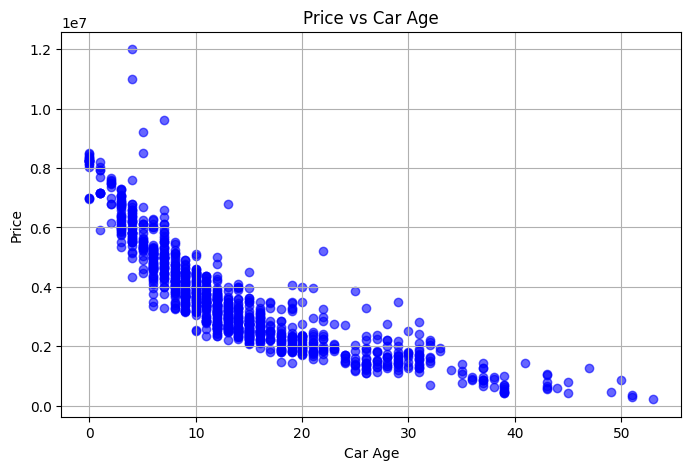

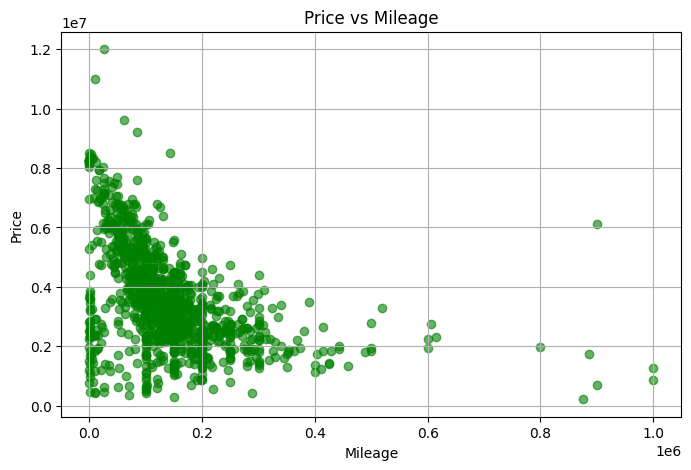

In [625]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
df_plot = df[["CarAge", "Mileage", "Price"]].copy()

# Plot 1: CarAge vs Price
plt.figure(figsize=(8,5))
plt.scatter(df_plot["CarAge"], df_plot["Price"], color='blue', alpha=0.6)
plt.xlabel("Car Age")
plt.ylabel("Price")
plt.title("Price vs Car Age")
plt.grid(True)
plt.show()

# Plot 2: Mileage vs Price
plt.figure(figsize=(8,5))
plt.scatter(df_plot["Mileage"], df_plot["Price"], color='green', alpha=0.6)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage")
plt.grid(True)
plt.show()


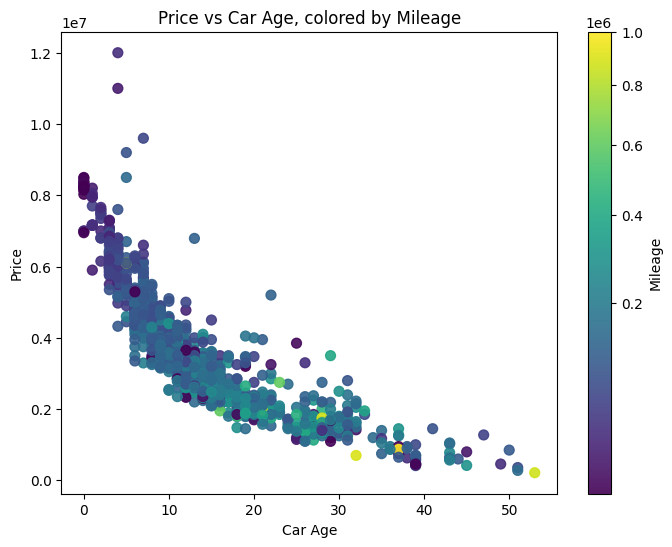

In [626]:
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

x = df['CarAge']
y = df['Price']
color_val = df['Mileage']  # the variable to map to color

plt.figure(figsize=(8,6))
sc = plt.scatter(
    x, y,
    c=color_val,
    cmap='viridis',
    norm=PowerNorm(gamma=0.55),  # gamma <1 emphasizes lower values
    s=50,
    alpha=0.9
)
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.title('Price vs Car Age, colored by Mileage')
plt.colorbar(sc, label='Mileage')
plt.show()


Train/Test

In [627]:
# Features (include binary feature columns dynamically)
feature_cols = list(mlb.classes_)

X = df[["City", "Mileage", "Fuel", "Transmission", "Engine Capacity",
        "Color", "CarAge", "Registered In", "Assembly"] + feature_cols]
y = df["Price"]

X.head()

# Categorical & numeric cols
categorical_cols = ["City", "Fuel", "Transmission", "Color", "Registered In", "Assembly"]
numeric_cols = ["Mileage", "Engine Capacity", "CarAge"] + feature_cols

# Preprocessor
preprocessor = ColumnTransformer([
    ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("numeric", StandardScaler(), numeric_cols)
])


In [628]:
df.shape

(1111, 51)

Model Training

In [629]:
# Model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=300, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

#saving the model
joblib.dump(model, f"model/{brand}_{car}_model.pkl")
print(f"Model saved to {brand}_{car}_model.pkl")
joblib.dump(mlb, f"model/{brand}_{car}_mlb.pkl")
print(f"MLB saved to {brand}_{car}_mlb.pkl")


Model saved to Toyota_Corolla_model.pkl
MLB saved to Toyota_Corolla_mlb.pkl


Eval

In [630]:

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R²: {r2:.3f}")
print(f"mape: {mape:,.2f}")


MAE: 257,092
RMSE: 383,023
R²: 0.950
mape: 9.23
